In [52]:
%load_ext autoreload
%autoreload 2

from pyshred.processor.data_manager import DataManager
from pyshred.models.sindy_dynamics import SINDyDynamics
from pyshred.models.shred import SHRED

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
from scipy.io import loadmat
import numpy as np

mat = loadmat("SST_data.mat")          # load MATLAB file
arr = mat['Z'].T                   # extract the variable you want
# arr = arr.reshape(1400, 180, 360)

# import numpy as np
# import matplotlib.pyplot as plt

# timestep0 = arr[200]

# # Plotting
# plt.figure()
# plt.imshow(timestep0)
# plt.colorbar(label="Value")
# plt.show()
arr.shape


(1400, 64800)

In [114]:
manager = DataManager(
    lags = 52,
    train_size = 0.8,
    val_size = 0.1,
    test_size = 0.1,
    holdout_size = 0.1
)

In [115]:
manager.add_data(
    data = arr,
    id = "SST",
    random = 250,
    # stationary = [(46, 227),(120, 60),(134, 303)],
    # measurements=measurements,
    compress=False,
    scale=True
)

In [116]:
datasets = manager.prepare()

In [117]:
manager.sensor_summary_df

,data id,number,type,loc/traj
0,SST,0,stationary (random),"(17929,)"
1,SST,1,stationary (random),"(13589,)"
2,SST,2,stationary (random),"(62363,)"
3,SST,3,stationary (random),"(49124,)"
4,SST,4,stationary (random),"(47141,)"
...,...,...,...,...
245,SST,245,stationary (random),"(51030,)"
246,SST,246,stationary (random),"(35712,)"
247,SST,247,stationary (random),"(46755,)"
248,SST,248,stationary (random),"(53759,)"


In [118]:
manager.sensor_measurements_df

data id,SST-0,SST-1,SST-2,SST-3,SST-4,SST-5,SST-6,SST-7,SST-8,SST-9,...,SST-240,SST-241,SST-242,SST-243,SST-244,SST-245,SST-246,SST-247,SST-248,SST-249
0,6.67,0.0,-0.0,12.95,14.37,28.839999,-0.0,4.62,-0.0,19.750000,...,0.0,25.389999,18.51,23.279999,27.959999,8.50,28.599999,19.14,4.09,-1.80
1,5.92,0.0,-0.0,13.66,14.47,28.969999,-0.0,3.93,-0.0,19.670000,...,0.0,25.379999,18.40,23.469999,27.609999,8.33,28.769999,19.35,3.82,-1.79
2,6.14,0.0,-0.0,13.32,14.88,28.759999,-0.0,3.66,-0.0,19.600000,...,0.0,25.149999,18.01,24.119999,27.359999,8.42,29.009999,19.82,4.06,-1.80
3,5.92,0.0,-0.0,13.54,15.29,28.519999,-0.0,3.91,-0.0,19.710000,...,0.0,25.559999,17.84,23.939999,26.879999,8.89,29.189999,19.42,4.29,-1.74
4,5.97,0.0,-0.0,14.41,14.98,28.819999,-0.0,4.33,-0.0,19.630000,...,0.0,25.849999,17.60,24.139999,26.919999,8.83,29.029999,20.38,4.09,-1.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,20.37,0.0,-0.0,11.73,11.74,28.719999,0.0,8.55,-0.0,26.939999,...,0.0,24.789999,20.71,21.070000,29.769999,6.68,26.939999,12.99,-0.79,-1.13
1396,19.77,0.0,-0.0,12.11,11.89,28.639999,0.0,7.88,-0.0,26.729999,...,0.0,23.909999,20.81,21.260000,29.749999,6.66,26.589999,13.90,-0.29,-1.14
1397,18.71,0.0,-0.0,11.91,11.91,28.429999,0.0,7.16,-0.0,25.869999,...,0.0,23.949999,21.09,21.130000,29.559999,6.53,26.629999,14.50,-0.24,-1.20
1398,18.94,0.0,-0.0,11.95,11.54,28.489999,0.0,7.12,-0.0,24.629999,...,0.0,24.219999,20.99,21.440000,29.249999,6.72,26.469999,14.57,-0.35,-1.23


In [119]:
from pyshred.models import sindy_shred
from pyshred.models import sindy
import torch

latent_dim = 3
poly_order = 1
include_sine = False
library_dim = sindy.library_size(latent_dim, poly_order, include_sine, True)

In [120]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

shred = sindy_shred.SINDy_SHRED(250, arr.shape[1], hidden_size=latent_dim, hidden_layers=2, l1=350, l2=400, dropout=0.1,
                                 library_dim=library_dim, poly_order=poly_order,
                                include_sine=include_sine, dt=1/52.0*0.1, layer_norm=False).to(device)

validation_errors = sindy_shred.fit(shred, datasets[0], datasets[1], batch_size=128, num_epochs=50,
                                    lr=1e-3, verbose=True, threshold=0.25, patience=5, sindy_regularization=10.0,
                                    optimizer="AdamW", thres_epoch=100)

1 : tensor(0.1702, grad_fn=<AddBackward0>)
2 : tensor(0.0997, grad_fn=<AddBackward0>)
3 : tensor(0.0794, grad_fn=<AddBackward0>)
4 : tensor(0.0745, grad_fn=<AddBackward0>)
5 : tensor(0.0723, grad_fn=<AddBackward0>)
6 : tensor(0.0704, grad_fn=<AddBackward0>)
7 : tensor(0.0693, grad_fn=<AddBackward0>)
8 : tensor(0.0681, grad_fn=<AddBackward0>)
9 : tensor(0.0674, grad_fn=<AddBackward0>)
10 : tensor(0.0666, grad_fn=<AddBackward0>)
11 : tensor(0.0658, grad_fn=<AddBackward0>)
12 : tensor(0.0651, grad_fn=<AddBackward0>)
13 : tensor(0.0644, grad_fn=<AddBackward0>)
14 : tensor(0.0637, grad_fn=<AddBackward0>)
15 : tensor(0.0633, grad_fn=<AddBackward0>)
16 : tensor(0.0624, grad_fn=<AddBackward0>)
17 : tensor(0.0619, grad_fn=<AddBackward0>)
18 : tensor(0.0614, grad_fn=<AddBackward0>)
19 : tensor(0.0607, grad_fn=<AddBackward0>)
20 : tensor(0.0599, grad_fn=<AddBackward0>)
21 : tensor(0.0594, grad_fn=<AddBackward0>)
22 : tensor(0.0588, grad_fn=<AddBackward0>)
23 : tensor(0.0581, grad_fn=<AddBackward0

In [121]:
# Rate of sparsity
torch.mean(shred.e_sindy.coefficient_mask*1.0)

tensor(1.)

In [122]:
test_recons = (shred(datasets[2].X).detach().cpu().numpy())
test_ground_truth = (datasets[2].Y.detach().cpu().numpy())
print(np.linalg.norm(test_recons - test_ground_truth) / np.linalg.norm(test_ground_truth))

0.4851561


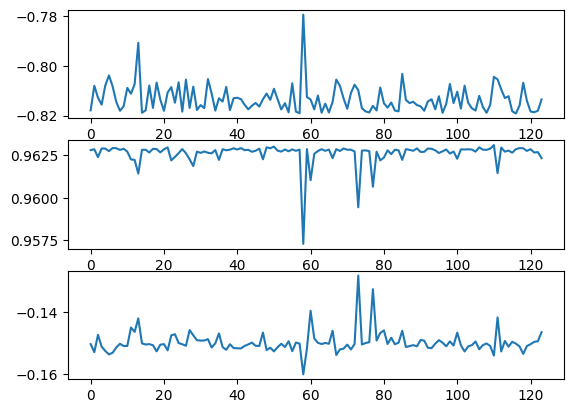

In [123]:

import matplotlib.pyplot as plt
import pysindy as ps
from pysindy.differentiation import FiniteDifference
gru_outs, sindy_outs = shred.gru_outputs(datasets[2].X, sindy=True)
differentiation_method = FiniteDifference()

fig, ax = plt.subplots(latent_dim)
for i in range(latent_dim):
    ax[i].plot(gru_outs[1:,0,i].detach().cpu().numpy())

(x0)' = -1.192 1 + 0.665 x0 + 2.210 x1 + 0.509 x2
(x1)' = 0.063 1 + -0.686 x0 + -1.250 x1 + -0.750 x2
(x2)' = -0.443 1 + 0.592 x0 + 1.421 x1 + 0.590 x2


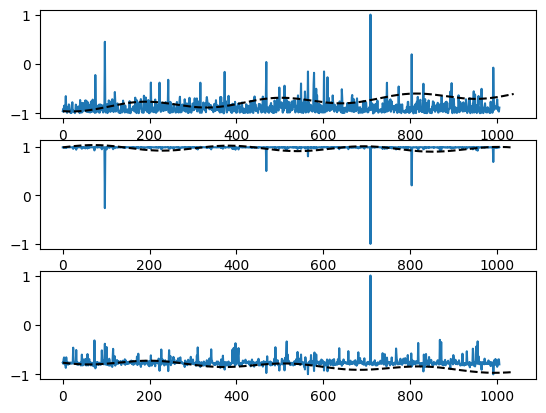

In [124]:
gru_outs, sindy_outs = shred.gru_outputs(datasets[0].X, sindy=True)
gru_outs = gru_outs[:,0,:]

poly_order = 1
threshold = 0.05

###############Normalization###############

gru_outs[:,0] = (gru_outs[:,0] - torch.min(gru_outs[:,0])) / (torch.max(gru_outs[:,0])-torch.min(gru_outs[:,0]))
gru_outs[:,1] = (gru_outs[:,1] - torch.min(gru_outs[:,1])) / (torch.max(gru_outs[:,1])-torch.min(gru_outs[:,1]))
gru_outs[:,2] = (gru_outs[:,2] - torch.min(gru_outs[:,2])) / (torch.max(gru_outs[:,2])-torch.min(gru_outs[:,2]))

gru_outs = 2 * gru_outs - 1

###############SINDy discovery###############

x = gru_outs.detach().cpu().numpy()

differentiation_method = ps.differentiation.FiniteDifference()
# differentiation_method = ps.differentiation.SmoothedFiniteDifference()

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=0.0, alpha=0.05),
    differentiation_method=differentiation_method,
    feature_library=ps.PolynomialLibrary(degree=poly_order)
)

# model = ps.SINDy(
#     optimizer=ps.MIOSR(group_sparsity=(2,2,2), alpha=5000),
#     differentiation_method=differentiation_method,
#     feature_library=ps.PolynomialLibrary(degree=poly_order),
# )
import math
import numpy as np
np.math = math

t_points = np.arange(0, len(x)) * (1/52.0)
model.fit(x, t=t_points)
model.print()


###############Plot the discovered SINDy model###############

t_train = np.arange(0, 20, 1/52.0)
init_cond = np.zeros(latent_dim)
init_cond[:latent_dim] = gru_outs[0,:].detach().cpu().numpy()
x_sim = model.simulate(init_cond, t_train)

fig, ax = plt.subplots(latent_dim)
for i in range(latent_dim):
    ax[i].plot(gru_outs[:,i].detach().cpu().numpy())
    ax[i].plot(x_sim[:,i], "k--", label="model")

In [74]:
dyn = SINDyDynamics(latent_dim=3, poly_order=1, include_sine=True, dt=1/52)
# model = SHRED(sequence_model="LSTM", decoder_model="SDN", dynamics=dyn, lambda_dyn=1e-3)
model = SHRED(dynamics=dyn, lambda_dyn=1e-3)

In [78]:
model.fit(train_dataset=datasets[0], val_dataset=datasets[1], num_epochs=50, sindy=False)

Epoch 1/50: 100%|██████████| 16/16 [00:00<00:00, 70.01batch/s, loss=0.0546, L2=12.3]


Epoch 1: train_loss=0.0546, train_L2=12.2810, val_L2=12.4313


Epoch 2/50: 100%|██████████| 16/16 [00:00<00:00, 67.23batch/s, loss=0.0219, L2=8.29]


Epoch 2: train_loss=0.0219, train_L2=8.2923, val_L2=10.0076


Epoch 3/50: 100%|██████████| 16/16 [00:00<00:00, 66.69batch/s, loss=0.019, L2=7.74]


Epoch 3: train_loss=0.0190, train_L2=7.7400, val_L2=9.4974


Epoch 4/50: 100%|██████████| 16/16 [00:00<00:00, 65.74batch/s, loss=0.0181, L2=7.55]


Epoch 4: train_loss=0.0181, train_L2=7.5483, val_L2=9.3843


Epoch 5/50: 100%|██████████| 16/16 [00:00<00:00, 52.70batch/s, loss=0.0176, L2=7.44]


Epoch 5: train_loss=0.0176, train_L2=7.4379, val_L2=9.3183


Epoch 6/50: 100%|██████████| 16/16 [00:00<00:00, 65.91batch/s, loss=0.0173, L2=7.37]


Epoch 6: train_loss=0.0173, train_L2=7.3686, val_L2=9.2503


Epoch 7/50: 100%|██████████| 16/16 [00:00<00:00, 60.92batch/s, loss=0.017, L2=7.32]


Epoch 7: train_loss=0.0170, train_L2=7.3178, val_L2=9.2320


Epoch 8/50: 100%|██████████| 16/16 [00:00<00:00, 67.83batch/s, loss=0.0169, L2=7.29]


Epoch 8: train_loss=0.0169, train_L2=7.2888, val_L2=9.1891


Epoch 9/50: 100%|██████████| 16/16 [00:00<00:00, 53.49batch/s, loss=0.0167, L2=7.25]


Epoch 9: train_loss=0.0167, train_L2=7.2472, val_L2=9.1751


Epoch 10/50: 100%|██████████| 16/16 [00:00<00:00, 73.24batch/s, loss=0.0167, L2=7.24]


Epoch 10: train_loss=0.0167, train_L2=7.2371, val_L2=9.1924


Epoch 11/50: 100%|██████████| 16/16 [00:00<00:00, 65.06batch/s, loss=0.0164, L2=7.19]


Epoch 11: train_loss=0.0164, train_L2=7.1870, val_L2=9.1793


Epoch 12/50: 100%|██████████| 16/16 [00:00<00:00, 73.26batch/s, loss=0.0164, L2=7.18]


Epoch 12: train_loss=0.0164, train_L2=7.1844, val_L2=9.1505


Epoch 13/50: 100%|██████████| 16/16 [00:00<00:00, 64.56batch/s, loss=0.0163, L2=7.17]


Epoch 13: train_loss=0.0163, train_L2=7.1706, val_L2=9.1131


Epoch 14/50: 100%|██████████| 16/16 [00:00<00:00, 72.89batch/s, loss=0.0162, L2=7.13]


Epoch 14: train_loss=0.0162, train_L2=7.1256, val_L2=9.0966


Epoch 15/50: 100%|██████████| 16/16 [00:00<00:00, 66.39batch/s, loss=0.016, L2=7.09]


Epoch 15: train_loss=0.0160, train_L2=7.0923, val_L2=9.0784


Epoch 16/50: 100%|██████████| 16/16 [00:00<00:00, 70.62batch/s, loss=0.016, L2=7.08]


Epoch 16: train_loss=0.0160, train_L2=7.0833, val_L2=9.0819


Epoch 17/50: 100%|██████████| 16/16 [00:00<00:00, 64.84batch/s, loss=0.0159, L2=7.06]


Epoch 17: train_loss=0.0159, train_L2=7.0557, val_L2=9.0337


Epoch 18/50: 100%|██████████| 16/16 [00:00<00:00, 69.71batch/s, loss=0.0158, L2=7.05]


Epoch 18: train_loss=0.0158, train_L2=7.0488, val_L2=9.0561


Epoch 19/50: 100%|██████████| 16/16 [00:00<00:00, 65.40batch/s, loss=0.0157, L2=7.02]


Epoch 19: train_loss=0.0157, train_L2=7.0211, val_L2=9.0006


Epoch 20/50: 100%|██████████| 16/16 [00:00<00:00, 72.35batch/s, loss=0.0155, L2=6.97]


Epoch 20: train_loss=0.0155, train_L2=6.9707, val_L2=8.9932


Epoch 21/50: 100%|██████████| 16/16 [00:00<00:00, 60.38batch/s, loss=0.0154, L2=6.95]


Epoch 21: train_loss=0.0154, train_L2=6.9505, val_L2=8.9025


Epoch 22/50: 100%|██████████| 16/16 [00:00<00:00, 69.67batch/s, loss=0.0152, L2=6.9]


Epoch 22: train_loss=0.0152, train_L2=6.9046, val_L2=8.8482


Epoch 23/50: 100%|██████████| 16/16 [00:00<00:00, 68.26batch/s, loss=0.0151, L2=6.88]


Epoch 23: train_loss=0.0151, train_L2=6.8809, val_L2=8.8142


Epoch 24/50: 100%|██████████| 16/16 [00:00<00:00, 72.22batch/s, loss=0.0149, L2=6.86]


Epoch 24: train_loss=0.0149, train_L2=6.8569, val_L2=8.8829


Epoch 25/50: 100%|██████████| 16/16 [00:00<00:00, 66.57batch/s, loss=0.0149, L2=6.85]


Epoch 25: train_loss=0.0149, train_L2=6.8456, val_L2=8.7403


Epoch 26/50: 100%|██████████| 16/16 [00:00<00:00, 70.64batch/s, loss=0.0147, L2=6.8]


Epoch 26: train_loss=0.0147, train_L2=6.7975, val_L2=8.6967


Epoch 27/50: 100%|██████████| 16/16 [00:00<00:00, 65.66batch/s, loss=0.0147, L2=6.8]


Epoch 27: train_loss=0.0147, train_L2=6.8037, val_L2=8.7119


Epoch 28/50: 100%|██████████| 16/16 [00:00<00:00, 73.01batch/s, loss=0.0146, L2=6.78]


Epoch 28: train_loss=0.0146, train_L2=6.7782, val_L2=8.7127


Epoch 29/50: 100%|██████████| 16/16 [00:00<00:00, 62.30batch/s, loss=0.0146, L2=6.77]


Epoch 29: train_loss=0.0146, train_L2=6.7657, val_L2=8.7034


Epoch 30/50: 100%|██████████| 16/16 [00:00<00:00, 64.79batch/s, loss=0.0145, L2=6.76]


Epoch 30: train_loss=0.0145, train_L2=6.7558, val_L2=8.6558


Epoch 31/50: 100%|██████████| 16/16 [00:00<00:00, 66.02batch/s, loss=0.0145, L2=6.75]


Epoch 31: train_loss=0.0145, train_L2=6.7506, val_L2=8.6818


Epoch 32/50: 100%|██████████| 16/16 [00:00<00:00, 66.93batch/s, loss=0.0146, L2=6.76]


Epoch 32: train_loss=0.0146, train_L2=6.7593, val_L2=8.6262


Epoch 33/50: 100%|██████████| 16/16 [00:00<00:00, 61.33batch/s, loss=0.0143, L2=6.71]


Epoch 33: train_loss=0.0143, train_L2=6.7097, val_L2=8.6649


Epoch 34/50: 100%|██████████| 16/16 [00:00<00:00, 66.63batch/s, loss=0.0143, L2=6.71]


Epoch 34: train_loss=0.0143, train_L2=6.7104, val_L2=8.6515


Epoch 35/50: 100%|██████████| 16/16 [00:00<00:00, 60.94batch/s, loss=0.0144, L2=6.71]


Epoch 35: train_loss=0.0144, train_L2=6.7146, val_L2=8.6125


Epoch 36/50: 100%|██████████| 16/16 [00:00<00:00, 66.13batch/s, loss=0.0143, L2=6.7]


Epoch 36: train_loss=0.0143, train_L2=6.7007, val_L2=8.6881


Epoch 37/50: 100%|██████████| 16/16 [00:00<00:00, 60.19batch/s, loss=0.0142, L2=6.67]


Epoch 37: train_loss=0.0142, train_L2=6.6716, val_L2=8.6208


Epoch 38/50: 100%|██████████| 16/16 [00:00<00:00, 64.55batch/s, loss=0.0142, L2=6.68]


Epoch 38: train_loss=0.0142, train_L2=6.6750, val_L2=8.5853


Epoch 39/50: 100%|██████████| 16/16 [00:00<00:00, 58.55batch/s, loss=0.0143, L2=6.69]


Epoch 39: train_loss=0.0143, train_L2=6.6852, val_L2=8.5775


Epoch 40/50: 100%|██████████| 16/16 [00:00<00:00, 69.63batch/s, loss=0.0142, L2=6.68]


Epoch 40: train_loss=0.0142, train_L2=6.6755, val_L2=8.5982


Epoch 41/50: 100%|██████████| 16/16 [00:00<00:00, 59.91batch/s, loss=0.0141, L2=6.65]


Epoch 41: train_loss=0.0141, train_L2=6.6520, val_L2=8.5704


Epoch 42/50: 100%|██████████| 16/16 [00:00<00:00, 71.80batch/s, loss=0.0141, L2=6.65]


Epoch 42: train_loss=0.0141, train_L2=6.6495, val_L2=8.5851


Epoch 43/50: 100%|██████████| 16/16 [00:00<00:00, 65.12batch/s, loss=0.0139, L2=6.61]


Epoch 43: train_loss=0.0139, train_L2=6.6098, val_L2=8.5939


Epoch 44/50: 100%|██████████| 16/16 [00:00<00:00, 71.58batch/s, loss=0.014, L2=6.63]


Epoch 44: train_loss=0.0140, train_L2=6.6265, val_L2=8.5638


Epoch 45/50: 100%|██████████| 16/16 [00:00<00:00, 60.82batch/s, loss=0.014, L2=6.63]


Epoch 45: train_loss=0.0140, train_L2=6.6334, val_L2=8.5792


Epoch 46/50: 100%|██████████| 16/16 [00:00<00:00, 65.09batch/s, loss=0.0139, L2=6.61]


Epoch 46: train_loss=0.0139, train_L2=6.6076, val_L2=8.6176


Epoch 47/50: 100%|██████████| 16/16 [00:00<00:00, 66.78batch/s, loss=0.0138, L2=6.6]


Epoch 47: train_loss=0.0138, train_L2=6.5975, val_L2=8.5107


Epoch 48/50: 100%|██████████| 16/16 [00:00<00:00, 59.27batch/s, loss=0.0138, L2=6.59]


Epoch 48: train_loss=0.0138, train_L2=6.5891, val_L2=8.6032


Epoch 49/50: 100%|██████████| 16/16 [00:00<00:00, 71.22batch/s, loss=0.0138, L2=6.59]


Epoch 49: train_loss=0.0138, train_L2=6.5914, val_L2=8.5687


Epoch 50/50: 100%|██████████| 16/16 [00:00<00:00, 62.63batch/s, loss=0.0138, L2=6.59]

Epoch 50: train_loss=0.0138, train_L2=6.5906, val_L2=8.6283


array([12.43132687, 10.00756454,  9.49737167,  9.38429546,  9.31825066,
        9.2502861 ,  9.23198223,  9.18914604,  9.17513752,  9.19237041,
        9.17928505,  9.1505146 ,  9.11313438,  9.09661674,  9.07842255,
        9.08189487,  9.03371906,  9.05614758,  9.00055695,  8.99321079,
        8.90254116,  8.8481741 ,  8.81416702,  8.88291168,  8.74031639,
        8.69668961,  8.71192074,  8.71265697,  8.70335388,  8.65582848,
        8.68183613,  8.62618351,  8.66485405,  8.651474  ,  8.61249161,
        8.68805027,  8.62082672,  8.58533001,  8.57753754,  8.59822083,
        8.57037926,  8.58507538,  8.59386826,  8.56378174,  8.5791626 ,
        8.61763096,  8.51070213,  8.60322475,  8.56868076,  8.62832928])

In [79]:
dyn.print_equations()

dz0/dt = 0
dz1/dt = 0
dz2/dt = 0
